In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [6]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [14]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target
#np.concatenate: 넘파이 객체를 합칠 때 사용하는 메서드

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
from sklearn.model_selection import train_test_split

fish_train, fish_test, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

fish_train.shape

(36, 2)

In [17]:
fish_test.shape

(13, 2)

In [18]:
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
fish_train, fish_test, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state = 42)
#stratify 매개변수에  타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다

In [21]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_train, train_target)

KNeighborsClassifier()

In [23]:
kn.score(fish_test, test_target)

1.0

In [26]:
kn.predict([[25, 150]])

array([0.])

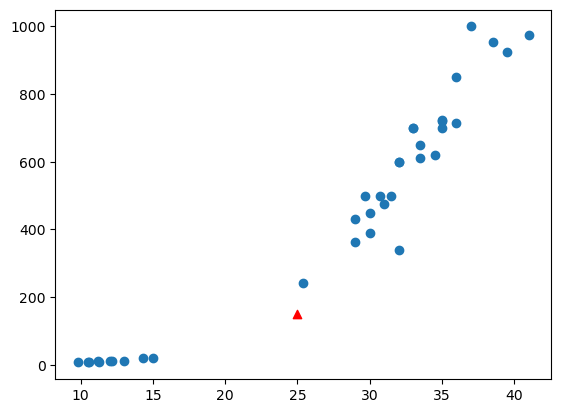

In [36]:
plt.scatter(fish_train[:,0], fish_train[:,1])
plt.scatter(25, 150, marker='^', c='r')
plt.show()

k 최근접 알고리즘은 기본적으로 가장 가까운 값 5개를 통해 값을 유추

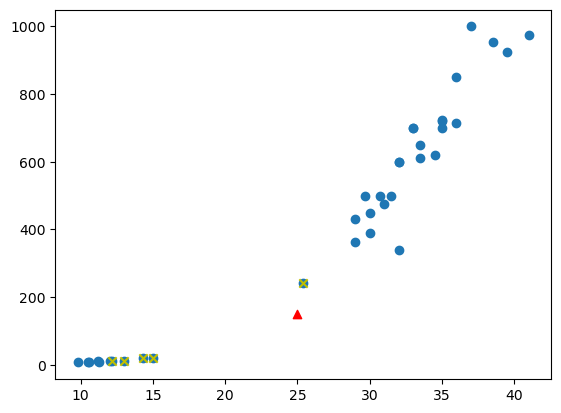

In [42]:
distance, index = kn.kneighbors([[25, 150]])
plt.scatter(fish_train[:,0], fish_train[:,1])
plt.scatter(25,150, marker='^', c='r')
plt.scatter(fish_train[index,0], fish_train[index,1], c='y', marker='x')
plt.show()

In [43]:
fish_train[index]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [44]:
train_target[index]

array([[1., 0., 0., 0., 0.]])

In [45]:
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

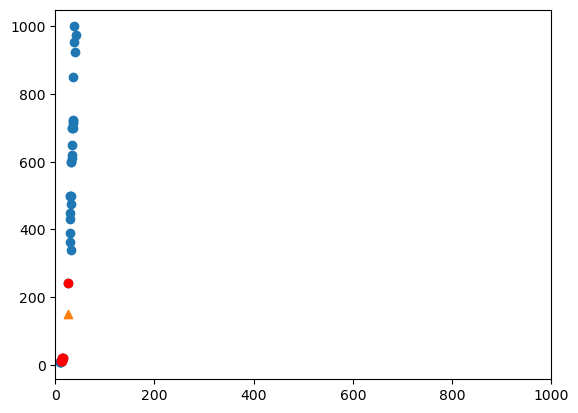

In [47]:
plt.scatter(fish_train[:,0], fish_train[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(fish_train[index,0], fish_train[index,1], c='r')
plt.xlim(0,1000)
plt.show()

In [49]:
mean = np.mean(fish_train, axis=0)
std = np.std(fish_train, axis=0)
mean

array([ 27.29722222, 454.09722222])

In [50]:
std

array([  9.98244253, 323.29893931])

In [52]:
fish_scaled = (fish_train - mean)/std

In [53]:
fish_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [54]:
new = ([25,150] - mean) / std

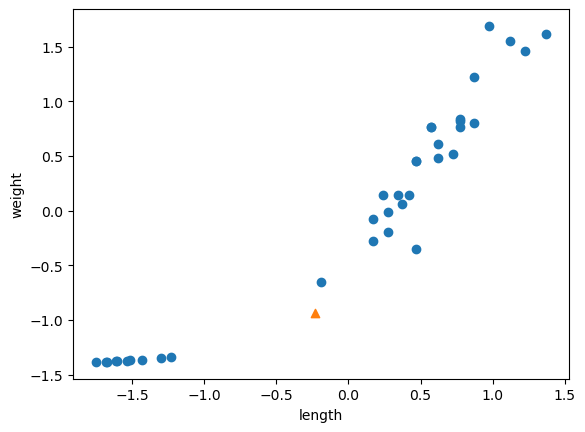

In [57]:
plt.scatter(fish_scaled[:,0], fish_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [58]:
kn.fit(fish_scaled, train_target)

KNeighborsClassifier()

In [59]:
test_scaled = (fish_test - mean) / std

In [61]:
kn.score(test_scaled, test_target)

1.0

In [65]:
kn.predict([new])

array([1.])

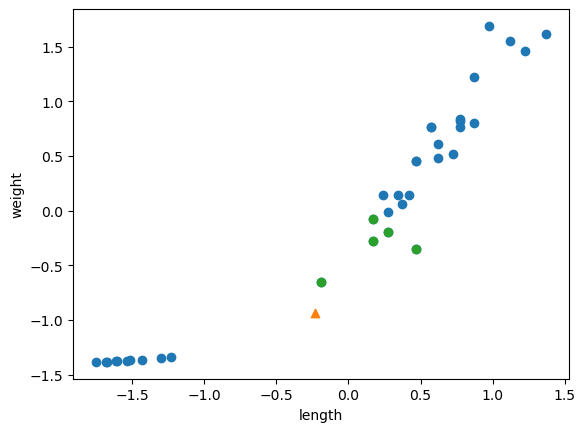

In [66]:
distance, index = kn.kneighbors([new])
plt.scatter(fish_scaled[:,0], fish_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(fish_scaled[index,0], fish_scaled[index,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()